<a href="https://colab.research.google.com/github/triooy/predictiong_ships_crew_size/blob/main/ML_Model_for_Predicting_Ships_Crew_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting ships crew size


In [54]:
# imports 
import numpy as np
import pandas as pd
import sklearn as sci
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# Reading and displaying data 


In [55]:
url = 'https://raw.githubusercontent.com/triooy/predictiong_ships_crew_size/main/cruise_ship_info.csv'
data = pd.read_csv(url)
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [56]:
data.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


# Plot data by crew size

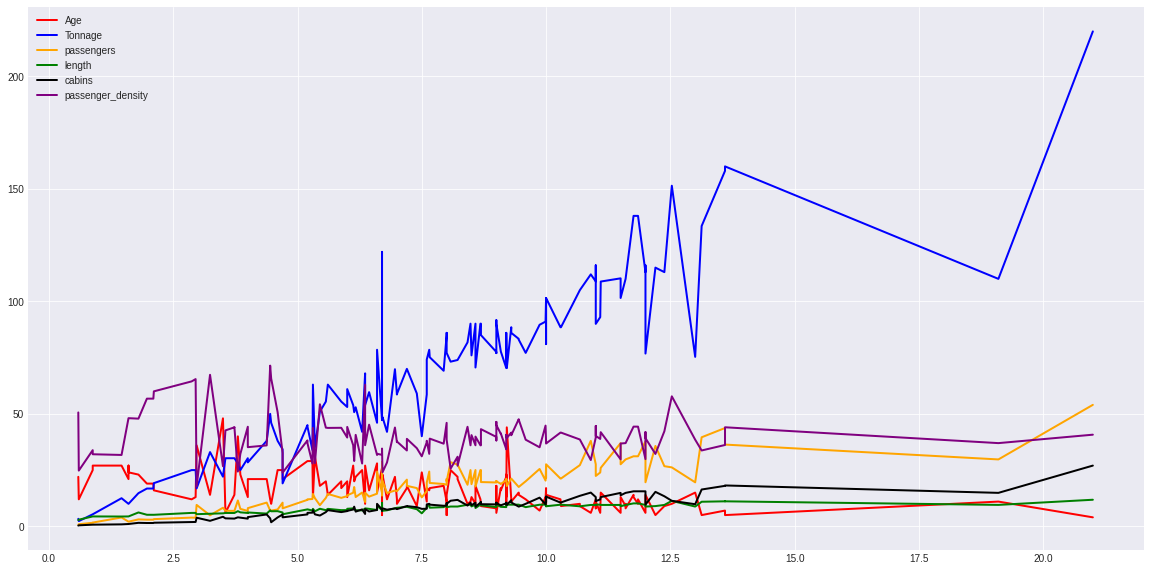

In [57]:
data_sorted_by_crew_size = data.sort_values('crew')
# style
plt.style.use('seaborn-darkgrid')

# size
plt.figure(figsize=(20,10))

# multiple line plot
plt.plot( 'crew', 'Age', data=data_sorted_by_crew_size, color='red', linewidth=2)
plt.plot( 'crew', 'Tonnage', data=data_sorted_by_crew_size, color='blue', linewidth=2)
plt.plot( 'crew', 'passengers', data=data_sorted_by_crew_size, color='orange', linewidth=2)
plt.plot( 'crew', 'length', data=data_sorted_by_crew_size, color='green', linewidth=2)
plt.plot( 'crew', 'cabins', data=data_sorted_by_crew_size, color='black', linewidth=2)
plt.plot( 'crew', 'passenger_density', data=data_sorted_by_crew_size, color='purple', linewidth=2)
plt.legend()
plt.show()

Seems like the cabins and the passengers feature are the most important for predicting the crew size

# Preparing data

In [58]:
y = data['crew'].values
x = data.iloc[:,2:-1].values

# split data in train and test sets by 70:30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# normalize
transformer = StandardScaler().fit(X_train)
X_train, X_test = transformer.transform(X_train), transformer.transform(X_test)

# Regressor Model

In [59]:
reg = LinearRegression().fit(X_train, y_train)

In [60]:
y_pred = reg.predict(X_test)

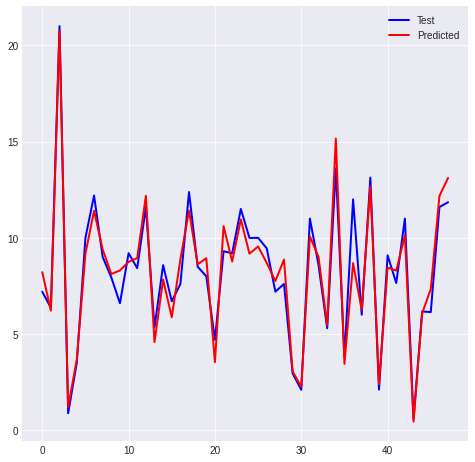

Explained Variance Score: 0.9407707726194479
MSE test: 0.805
R^2 test: 0.941


In [62]:
# size
plt.figure(figsize=(8,8))

x_grid = np.arange(48)


# multiple line plot
plt.plot( x_grid, y_test, color='blue', linewidth=2, label='Test')
plt.plot( x_grid, y_pred, color='red', linewidth=2, label='Predicted')
plt.legend()
plt.show()

print("Explained Variance Score: {}".format(explained_variance_score(y_test, y_pred)))
print('MSE test: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))


# Feature importance

In [63]:
from sklearn.inspection import permutation_importance
r = permutation_importance(reg, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.iloc[:,2:-1].columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")


cabins  2.537 +/- 0.398
passengers0.437 +/- 0.072
length  0.080 +/- 0.019


# New Model for better generalization

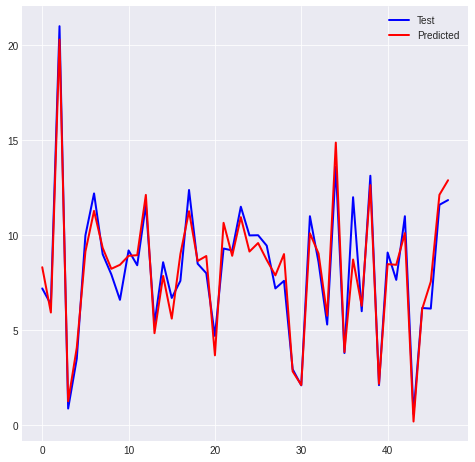

Explained Variance Score: 0.9376726827700135
MSE test: 0.848
R^2 test: 0.938


In [64]:
y = data['crew'].values
x = data[['cabins', 'passengers','length']].values

# split data in train and test sets by 70:30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# normalize
transformer = StandardScaler().fit(X_train)
X_train, X_test = transformer.transform(X_train), transformer.transform(X_test)


reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# size
plt.figure(figsize=(8,8))

x_grid = np.arange(48)


# multiple line plot
plt.plot( x_grid, y_test, color='blue', linewidth=2, label='Test')
plt.plot( x_grid, y_pred, color='red', linewidth=2, label='Predicted')
plt.legend()
plt.show()

print("Explained Variance Score: {}".format(explained_variance_score(y_test, y_pred)))
print('MSE test: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))
